# Regressão Linear Múltipla

Este notebook mostra o treinamento e os resultados de validação de um modelo de Regressão Linear Múltipla para a predição de valores do custo de um seguro de saúde. O dataset utilizado foi o Medical Cost Personal Dataset que pode ser encontrado em: https://www.kaggle.com/mirichoi0218/insurance.

O objetivo deste notebook é o treinamento do modelo para a predição dos custos com o seguro de saúde com base nos atributos fornecidos pelo dataset que são:


*   Age: Idade do beneficiário
*   Sex: Gênero do contratante (masculino, feminino)
*   BMI: Índice de massa corpórea(IMC)
*   Children: Quantidade de criaças cobertas pelo seguro / quantidade de dependentes
*   Smoker: Informa se o usuário é fumante
*   Region: Informa a área em que o beneficiário reside nos EUA.
*   Charges: Custo individual do seguro de saúde (Target da predição) 



# Importação e Análise inicial dos dados

In [3]:
import pandas as pd
dados = pd.read_csv("insurance.csv")

In [4]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
dados.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
#verificando valores NaN no dataset
print(dados.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [8]:
#verificando valores null no dataset
print(dados.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [10]:
#separando os dados categóricos
categoricos = dados.iloc[:, [1, 4, 5]]
categoricos.head()


,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


# Tratamento de dados categóricos

In [12]:
#transformando os dados categóricos em números
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

dados['sex'] = label_encoder.fit_transform(dados['sex'])
dados['smoker'] = label_encoder.fit_transform(dados['smoker'])
dados['region'] = label_encoder.fit_transform(dados['region'])

dados['sex'].unique()

array([0, 1])

In [13]:
dados['smoker'].unique()


array([1, 0])

In [14]:
dados['region'].unique()

array([3, 2, 1, 0])

In [15]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Preparação para etapa de treinamento

In [20]:
X = dados.iloc[:, [0, 1, 2, 3, 4, 5]]
y = dados.iloc[:, 6]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 # Análise de Correlação

In [23]:
dados.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


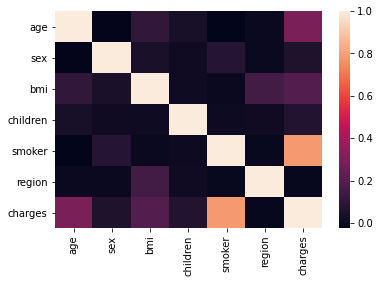

In [24]:
sns.heatmap(dados.corr())

# Seleção de atributos

In [37]:
X = dados.iloc[:, [0, 2, 4]]
y = dados.iloc[:, 6]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predição

In [38]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

In [39]:
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 34512843.88


In [40]:
print("Variance score: %.2f" % r2_score(y_test, y_pred))

Variance score: 0.78


In [42]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [  259.41020462   326.45023215 23675.37184666]
